# Assignment linear regression

## 1.  What is a linear regression?
How well a model predicts can be measured by a linear regression: 

$y = b_{0} + b_{1} X + e$

The formula for a simple linear regression can be explained as followed:
- **Dependent and independent variables**: We define a dependent ($Y$) and independent ($X$) variable wheares the X values are independent, meaning they can influence the other, dependent Y variable. For example, house prices ($Y$) can vary based on the squared meters of the house area ($X$). 
- **The coefficients**: The coefficients consists of *the intercept* ($b_{0}$) and the slope ($b_{1}$). When looking at a linear regression line, the intercept is the line that crosses the Y-axis. The slope is the vertical change compared to the horizontal change. The coefficient is also called the constant because these values don't change. 
- **Error/residual**: The error/residual ($e$) is different for each point.  The further the points are from the line, the bigger the $e$ value is. This value represents the amount that your model is off the line or incorrect. The points which are not "around" the line cannot always be explained. 

A simple linear regression can be used for one dependent and one independent variable. When using more than 2 variables, we can use the multiple linear regression:

$y = b_{0} + b_{1} X_{1} + b_{2}X_{2}+ ... + e$

The formulas give a impression on how accurate your model predicts. However, what kind of data plays a large role in the interpreation of the outcomes.
For example when predicting the weather, the model can be compared with other models. Therefore, the results of the prediction should be and are more easily to compare to other weather prediction models. But, when working with new data, often in social sciences, the effectiveness of the prediction can low and is more difficult to compare to similair models. 

## 2 Predicting viral news articles
### 2.1 First look at the data

For the prediction of viral articles from Mashable data, we're using the multiple linear regression formula. Before we start, we have to clean up the data file. 

In [3]:
# Import the important libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
# Show the original dataset
df = pd.read_csv('data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [5]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

In [6]:
df = df.sort_values(by='shares_log', ascending=False)
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918


### 2.2 Defining X and Y variables

To get an overview of the variables which are most likely to have a correlation with shares_log, we can check the correlation in the correlation matrix.

In [7]:
# Create a correlation matrix
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


The Y-variable is shares_log. According to the highest $r$ values from the correlation matrix, shares_log is mostly correlated with the following variables:
1. is_weekend (0.105919)
2. num_imgs (0.085575)
4. data_channel_is_socmed (0.085516)
3. global subjectivity (0.093021), global_sentiment_polarity (0.053199)
5. title_subjectivity (0.055161), title_sentiment_polarity (0.050216)

A visualization of the correlation gives a clear picture of the correlations:

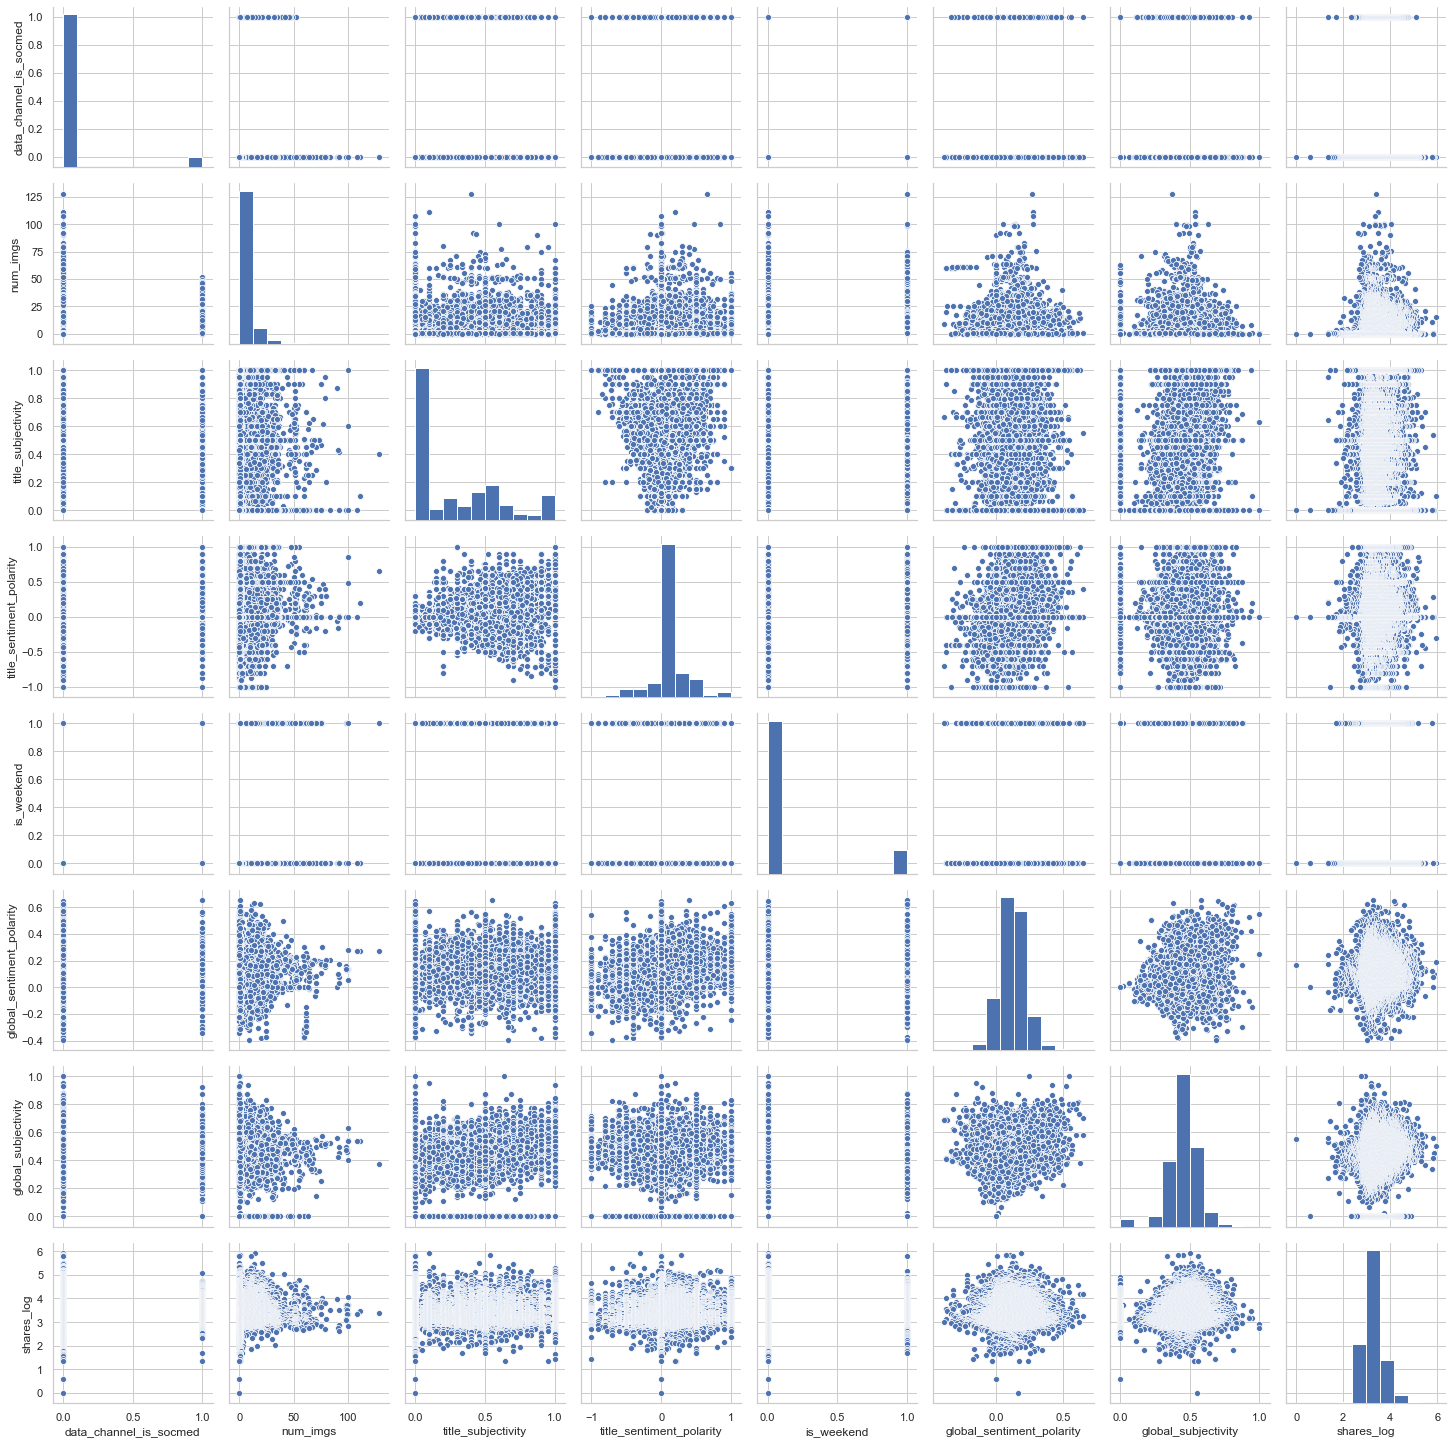

In [14]:
# Create a new dataframe with a subset
df_shares = df[['data_channel_is_socmed', 'num_imgs','title_subjectivity','title_sentiment_polarity', 'is_weekend','global_sentiment_polarity', 'global_subjectivity', 'shares_log']]

# Create a scatterplot matrix to get an overview of the variables we're going to use
sns.set(style="whitegrid")
sns.pairplot(df_shares)
plt.show()

Most datapoints are settled in the middle of the figure, which correlates to the most share logs (which are also settled in the middle of the figure). We can find a few exceptions: 
- The datapoints for "is_weekend" are differently spread in the figure than the other variables. This can be explained by the value which is either 0 or 1 (true or false). 
- The datapoints for "data_channel_is_socmed" are also differently because of the same explaination as for "is_weekend". 


*The question is: is it better not to use these true/false values for the prediction? What is the effect of these values? When removing these variables in the training set, we found a lower value for $R^{2}$. Therefore, we assume it's better to use these variables since this indicates that these values do have impact on the correlation*

## 3. Create a predictive model
### 3.1 Train the model
Before we're going to predict the actual values for **shares_log**, we're going to train the model first in order to get the most accurate prediction.

We know from the previous steps which Y and X variables we need to use. Now we can define this so we can use it in the next steps for calculating the linear regression.

In [15]:
# Seperate x and y variables
y = df['shares_log'] # Specifiy the Y variable (shares_log)
y.index = df['url'] # Use URL as Y index
X = df[['data_channel_is_socmed', 'num_imgs','is_weekend', 'title_subjectivity','title_sentiment_polarity','global_subjectivity', 'global_sentiment_polarity']] # Slice the dataframe to include the x-variables
X.index = df['url'] # Store URL as index so we know which article belongs to which values
X.head()

,data_channel_is_socmed,num_imgs,is_weekend,title_subjectivity,title_sentiment_polarity,global_subjectivity,global_sentiment_polarity
url,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,0,15,0,0.100000,-0.300000,0.503345,0.186037
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,0,0,0,0.000000,0.000000,0.450678,0.100533
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,0,1,0,0.535714,0.285714,0.415273,0.075724
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,0,0,0,0.000000,0.000000,0.556854,0.004040
http://mashable.com/2013/03/02/wealth-inequality/,0,11,1,0.000000,0.000000,0.340229,0.125005


To train the model, we need to split the dataset into a randomized train set (70%) and randomized test set (30%):

In [16]:
# This built-in function from sk-learn splits the data set randomly into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Split the data, store it into different variables
X_train.head() # Show the train dataset

,data_channel_is_socmed,num_imgs,is_weekend,title_subjectivity,title_sentiment_polarity,global_subjectivity,global_sentiment_polarity
url,,,,,,,
http://mashable.com/2013/10/17/randi-zuckerberg-book-dot/,0,1,0,0.00,0.00,0.487590,0.229769
http://mashable.com/2014/07/21/un-russia-malaysia-plane-crash/,0,3,0,0.75,0.45,0.487345,0.133080
http://mashable.com/2014/03/20/syria-goes-almost-completely-offline-again/,0,2,0,0.60,0.20,0.457477,0.055540
http://mashable.com/2013/02/21/facebook-voice-messages/,1,6,0,0.00,0.00,0.450740,0.210185
http://mashable.com/2013/10/19/apple-macbook-air-recall/,0,70,1,0.00,0.00,0.552876,-0.068837


Now we can train the model. First, we create the train model (lm) and train this by the linear regression. 

In [17]:
# Train the model
lm = LinearRegression() # Create the model
model = lm.fit(X_train, y_train) # Train the model

Let's review our linear regression formula.  

In [19]:
# Check the intercept
intercept = lm.intercept_ # Get the intercept
print(f"Intercept {intercept}")

Intercept 3.0545373739583206


In [21]:
# Check the coefficients (slopes)
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
print(f"Coefficients {coef}")

Coefficients                                   0
0.136709     data_channel_is_socmed
0.003024                   num_imgs
0.123111                 is_weekend
0.037376         title_subjectivity
0.046522   title_sentiment_polarity
0.295985        global_subjectivity
0.088943  global_sentiment_polarity


We can interpret these coefficients as followed:
* "global_subjectivity" increases log shares with **0.295985** 
* "data_channel_is_soomed" increases log shares with **0.136709** 
* "is_weekend" increases log shares with **0.123111**
* "global_sentiment_polarity" increases log shares with **0.088943** 
* "title_subjectivity" increases log shares with **0.037376** 
* "title_sentiment_polarity" increases log shares with **0.046522**
* "num_imgs" increases log shares with **0.003024**

The linear regression formula: 
$Logshares = 3.05 + b_{0.136709} + b_{0.003024}+ b_{0.123111} + b_{0.037376} + b_{0.046522} + b_{0.295985} +b_{0.088943} + e$



### 3.2 Test the model

For calculating the residual, we need to look at the test dataset instead of the train dataset.

In [26]:
# Calculate the residual
y_test_p = lm.predict(X_test)
e = y_test - y_test_p
e

url
http://mashable.com/2013/06/25/the-rock-hercules-diet/                              -0.152910
http://mashable.com/2014/03/13/new-mmo-games/                                       -0.190022
http://mashable.com/2013/02/04/brands-super-bowl-social-media/                       0.754095
http://mashable.com/2013/02/01/zen-twitter-cory-booker/                             -0.307942
http://mashable.com/2013/02/01/twitter-security-breach/                              0.876645
                                                                                       ...   
http://mashable.com/2014/04/23/sisterhood-of-the-traveling-pants-3-movie-trilogy/   -0.114178
http://mashable.com/2013/04/22/social-media-advice-column-4-22/                     -0.062859
http://mashable.com/2014/03/11/short-world-records/                                 -0.098824
http://mashable.com/2013/08/10/star-wars-medley/                                     0.097428
http://mashable.com/2014/06/13/friday-the-13th-full-moon

With R^2 we can calculate how well the model predicts shares_log values.

In [32]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
print(f"R^2 score: {r2_score(y_test, y_test_p)}")

R^2 score: 0.03164745982438388


The $R^{2}$ value is 0.0316, which means 32% of the variatiation is explained by the model. We need to increase this value. But we should first look at the RMSE value which indicates how typically off the predictions of the log shares are. 

In [31]:
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_test_p))}")

RMSE: 0.40661355856790193


The **RMSE** is 0.40. Which means that we are typically about 40% off in our predicted log shares. Let's see how this looks a figure. 

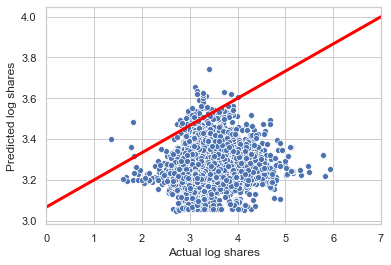

In [189]:
# Create a scatterplot with regression line
sns.set(style="whitegrid")
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,7]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.plot([0,7], [b0, 4], color='red', lw=3) #Plot a diagonal length
plt.show()

The scatterplot shows how off the model predicts the shares_log... But we can change the visualization by merging X and Y test values. 

In [180]:
# Show a table of merged X-test and Y-test values
df_test = pd.merge(X_test, y_test, on = "url") # Merge x and y variables from the test set with URL as index for df_test
df_test["shares_log_p"] = lm.predict(X_test) # Define shares_log_p as the prediction (R^2) of X_test
df_test["residuals"] = df_test["shares_log"] - df_test["shares_log_p"] # Substract and calculate the residual (e) with Y - Y'
df_test.head()

,data_channel_is_socmed,num_imgs,is_weekend,title_subjectivity,title_sentiment_polarity,global_subjectivity,global_sentiment_polarity,shares_log,shares_log_p,residuals
url,,,,,,,,,,
http://mashable.com/2013/06/25/the-rock-hercules-diet/,0,1,0,0.454545,0.136364,0.448498,0.207407,3.079181,3.232091,-0.152910
http://mashable.com/2014/03/13/new-mmo-games/,0,1,0,0.066667,0.000000,0.286548,0.073929,2.961421,3.151443,-0.190022
http://mashable.com/2013/02/04/brands-super-bowl-social-media/,0,1,0,0.444444,0.188889,0.386221,0.139595,3.963788,3.209693,0.754095
http://mashable.com/2013/02/01/zen-twitter-cory-booker/,0,1,0,0.500000,0.000000,0.433609,0.102835,2.905796,3.213738,-0.307942
http://mashable.com/2013/02/01/twitter-security-breach/,1,1,0,0.000000,0.000000,0.552016,0.042061,4.238046,3.361401,0.876645


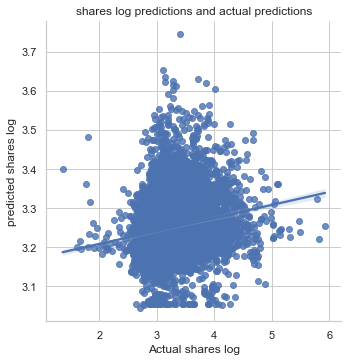

In [177]:
# Create a scatterplot with regression line of the shares log predictions compared to the actual predictions
sns.set(style="whitegrid")
sns.lmplot(x='shares_log', y='shares_log_p', fit_reg=True, data=df_test)
plt.title("shares log predictions and actual predictions")
plt.xlabel("Actual shares log")
plt.ylabel("predicted shares log")
plt.show()

Merging the X and Y values resulted in a better visualization of the predictive model. However, we can see that a lot of values are typically off the linear regression line. 

Let's see how well the predictive model performance with actual data. 

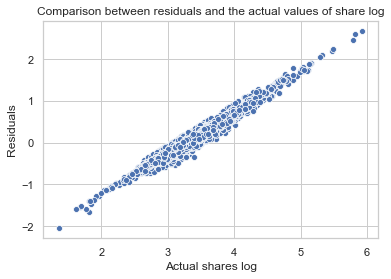

In [178]:
# Create a scatterplot with a comparison between the residuals and ACTUAL values of shares log
sns.set(style="whitegrid")
sns.scatterplot(data = df_test, x = "shares_log", y = "residuals")
plt.xlabel('Actual shares log')
plt.ylabel('Residuals')
plt.title("Comparison between residuals and the actual values of share log")
plt.show()

## Conclusion



With a $R^{2}$ value of 0.0316, the model predicts about 32% of the predicted viral news articles (shares_log) correctly. Compared to other predictions of viral news articles ([Yaser et al., 2017](https://www.researchgate.net/publication/306061597_Predicting_the_Popularity_of_News_Articles) ), this $R^{2}$ value is quite low. 